# Trabajo Integrador

## 1. Selección del dataset
Elegimos el **dataset 1**, que contiene datos sobre distintas estaciones meteorológicas de Australia.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [30]:
# Seteo esta opcion en True para evitar que me exprese los valores numericos con notacion cientifica
np.set_printoptions(suppress=True)

In [31]:
australian_weather_data = pd.read_csv('./data/weatherAUS.csv',encoding='utf-8',sep=',',skipinitialspace=True)

In [32]:
australian_weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## 2. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
    - Realizar los siguientes análisis por tipo de variable:
        - Numéricas: Obtener conclusiones acerca de la distribución de los datos.
        - Categóricas: Obtener conclusiones acerca de la cardinalidad, representación de cada categoría, etc.
        - Compuestas: ¿Pueden tratarse para utilizarse en el problema a resolver?
- Variables de salida (en caso de aplicar):
    - ¿Están balanceadas las clases?
    - (en caso de aplicar) ¿Qué técnicas consideraría para codificar la variable de salida? Justifique.

**Visualizamos las primeras filas**

In [33]:
australian_weather_data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Identificamos los tipos de datos**

In [34]:
australian_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [35]:
# Veamos una descripcion de las variables numericas con la ayuda de pandas

In [36]:
australian_weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


| Variable | Descripción | Tipo | Es informativa | Entrada / Salida | 
| -------- | ---------- | ---- | -------------- | ---------------- |
| Date     | Fecha de la medición | Fecha/Hora | Si | Entrada |
| Location | Ubicación geográfica | Categorica Nominal | Si | Entrada |
| MinTemp | Temperatura mínima registrada (celsius) | Numérica Continua | Si | Entrada |
| MaxTemp | Temperatura máxima registrada (celsius) |Numérica Continua | Si | Entrada |
| Rainfall | Precipitaciones registradas (mm) | Numérica Continua | Si | Entrada |
| Evaporation | Evaporación registrada (mm) | Numérica Continua | Si | Entrada |
| Sunshine | Cantidad de horas de sol | Numérica Continua | Si | Entrada |
| WindGustDir | Dirección del viento más fuerte registrado durante el día | Categórica Nominal | Si | Entrada |
| WindGustSpeed | Velocidad del viento más fuerte registrada durante el día (km/h) | Numérica continua | Si | Entrada |
| WindDir9am | Dirección del viento registrada a las 9 am | Categórica Nominal | Si | Entrada |
| WindDir3pm | Dirección del viento registrada a las 3 pm | Categórica Nominal | Si | Entrada |
| WindSpeed9am | Velocidad del viento registrada a las 9 am (km/h) | Numérica continua | Si | Entrada |
| WindSpeed3pm | Velocidad del viento registrada a las 3 pm (km/h) | Numérica continua | Si | Entrada |
| Humidity9am | Humedad registrada a las 9 am (%) | Numérica continua | Si | Entrada |
| Humidity3pm | Humedad registrada a las 3 pm (%) | Numérica continua | Si | Entrada |
| Pressure9am | Presión atmosférica registrada a las 9 am (hpa) | Numérica continua | Si | Entrada |
| Pressure3pm | Presión atmosférica registrada a las 3 pm (hpa) | Numérica continua | Si | Entrada |
| Cloud9am | Fracción del cielo oscurecido por las nubesa las 9 am | Numérica continua | Si | Entrada |
| Cloud3pm | Fracción del cielo oscurecido por las nubesa las 3 pm | Numérica continua | Si | Entrada |
| Temp9am | Temperatura registrada a las 9 am (celsius) | Numérica continua | Si | Entrada |
| Temp3pm | Temperatura registrada a las 3 pm (celsius) | Numérica continua | Si | Entrada |
| RainToday | Flag que indica si llovio durante el día (Yes/No) | Categorica Nominal | Si | Entrada |
| RainTomorrow | Flag que indica si lloverá al día siguiente (Yes/No) | Categórica Nominal | - | Salida |

**Analicemos las features numéricas**

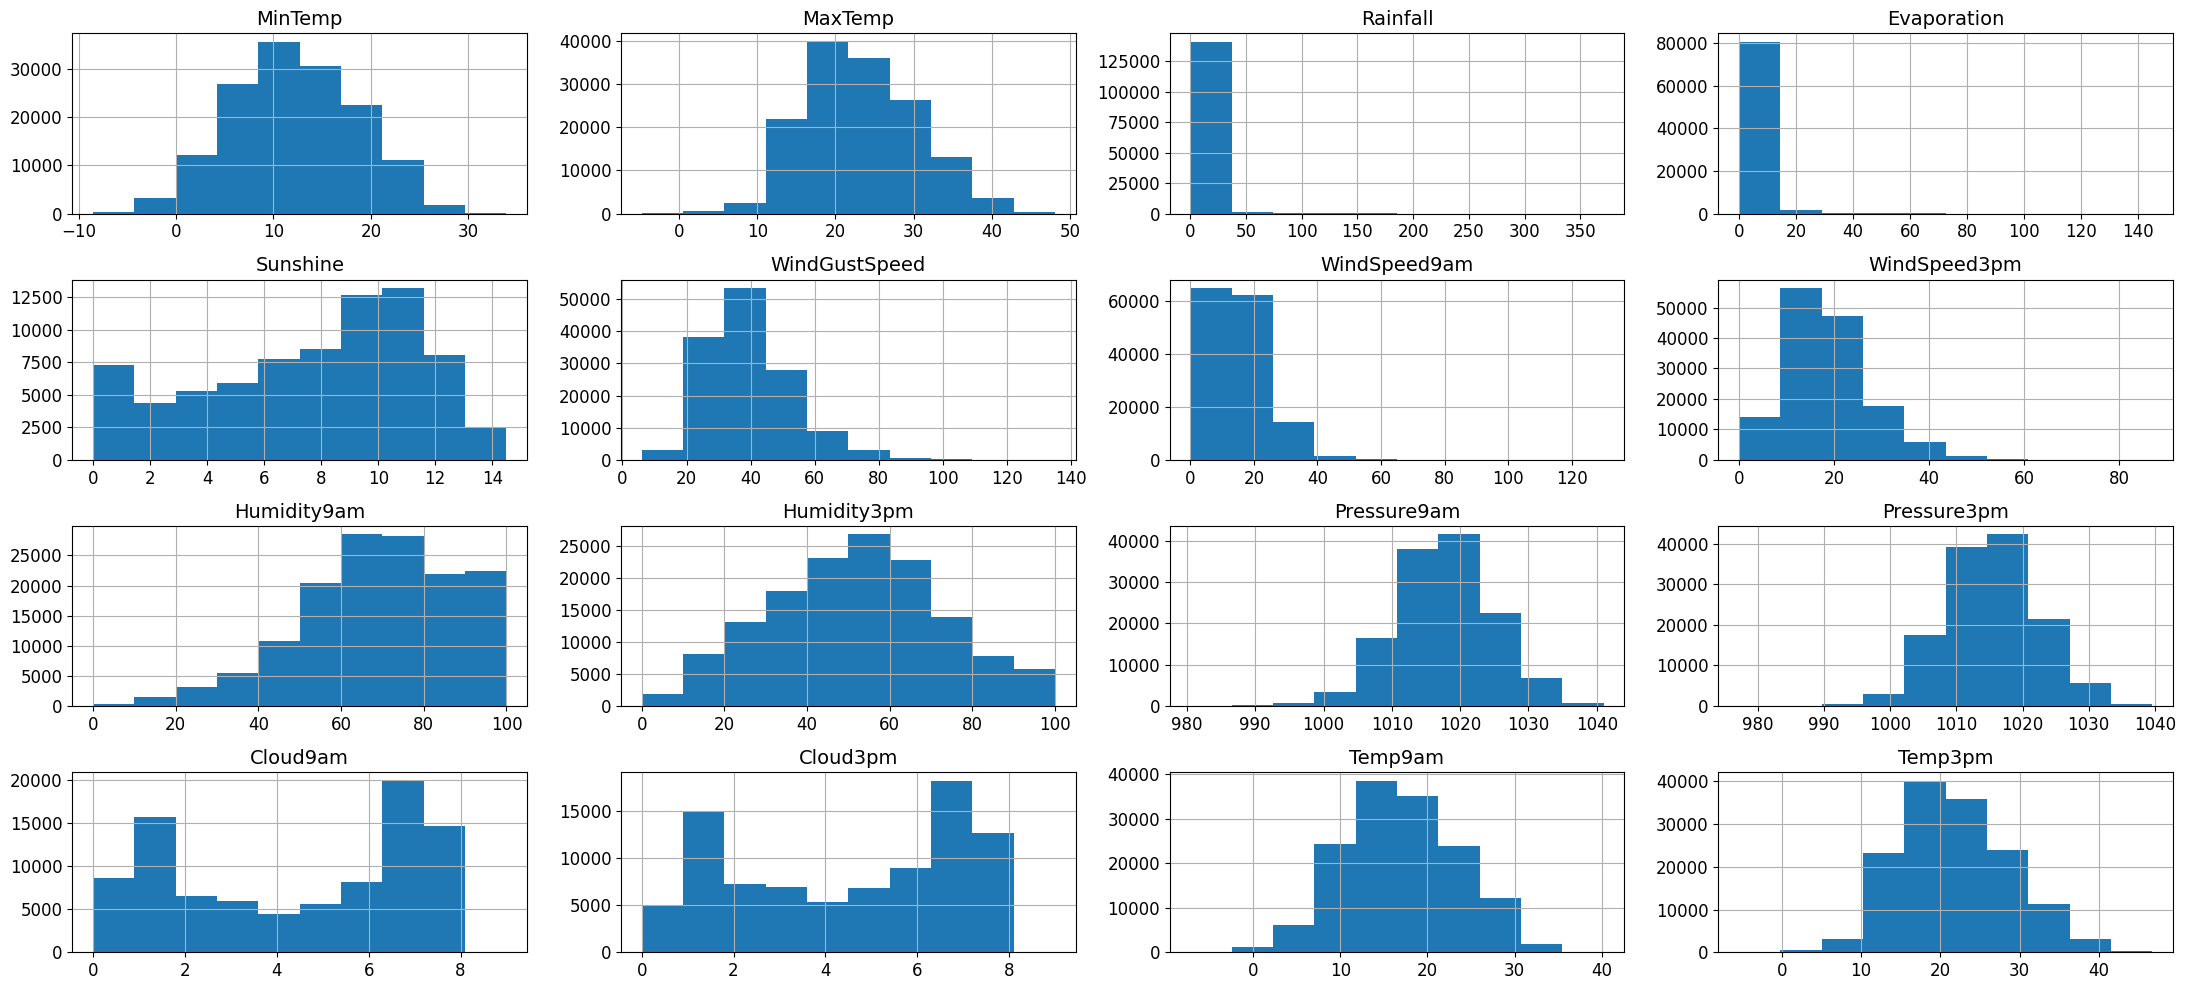

In [37]:
fig = australian_weather_data.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
[x.title.set_size(14) for x in fig.ravel()]
plt.tight_layout()
plt.show()

Viendo el histograma de las features numéricas, podemos inferir que:
- Las features **(Rainfall, Evaporation, Cloud9am, Cloud3pm)** tienen una distribución que **no** es normal.
- Las features restantes tienen una distribución normal pero no simétrica, con diferentes oblicuidades.

Proponemos entonces:
- Aplicar transformaciones a las features para normalizarlas.
- Estandarizarlas para escalarlas y que aquellas de mayor magnitud no dominen a las de menor magnitud.

**Analicemos las features categóricas**

Vamos a ver la cardinalidad de las variables categóricas

In [38]:
australian_weather_data.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [39]:
australian_weather_data.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [40]:
australian_weather_data.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [41]:
australian_weather_data.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [42]:
australian_weather_data.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

In [43]:
# Resumimos
cat_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

for col in cat_features:
    print('Feature: ', col, 'Number of categories: ', australian_weather_data[col].nunique())

Feature:  Location Number of categories:  49
Feature:  WindGustDir Number of categories:  16
Feature:  WindDir9am Number of categories:  16
Feature:  WindDir3pm Number of categories:  16
Feature:  RainToday Number of categories:  2


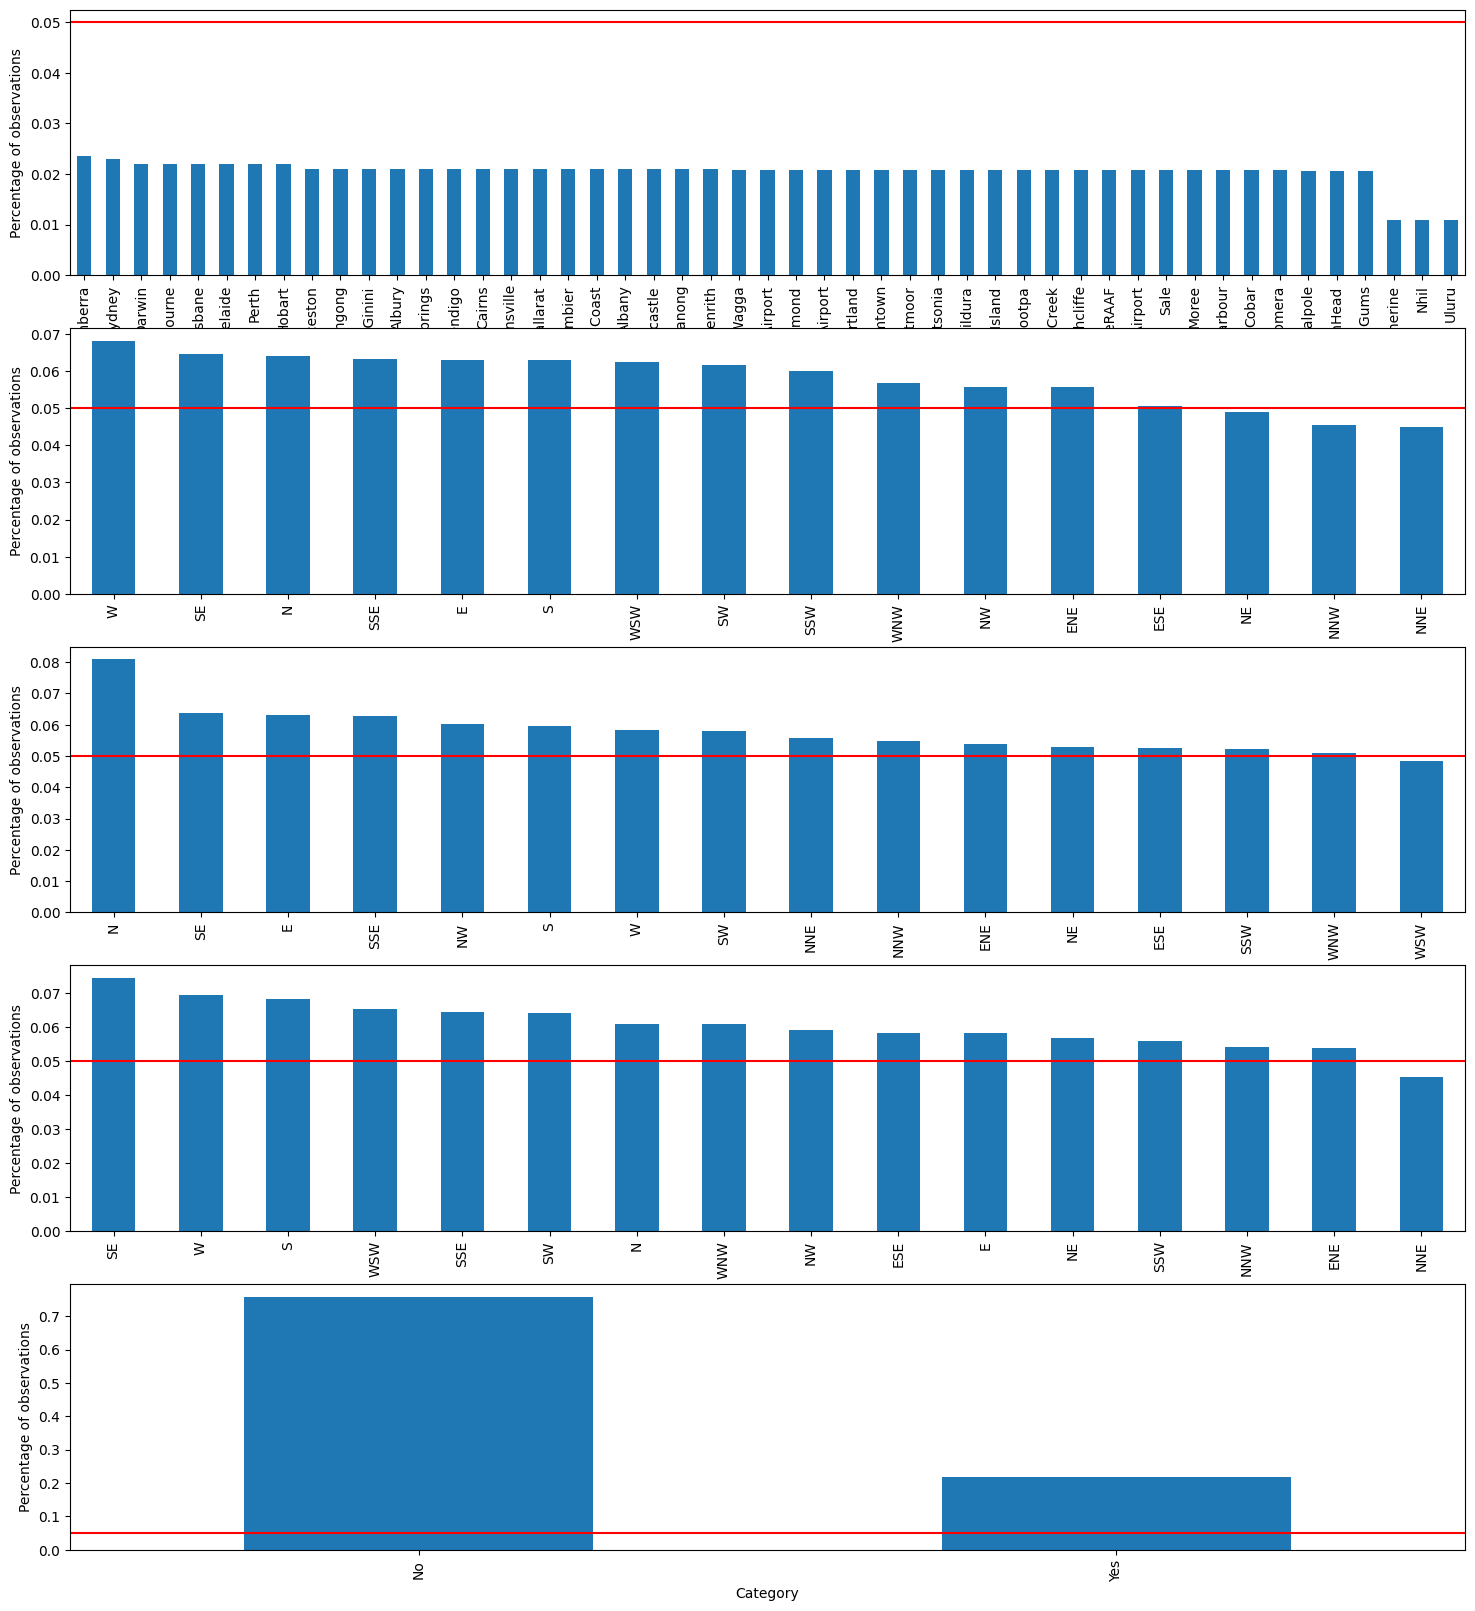

In [44]:
rows = len(australian_weather_data)

fig,axes = plt.subplots(len(cat_features),1,figsize=(18,len(cat_features)*4))
for i,col in enumerate(cat_features):
    frequencies = pd.Series(australian_weather_data[col].value_counts() / rows)
    frequencies.sort_values(ascending=False).plot.bar(ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].axhline(y=0.05, color='red')
    axes[i].set_ylabel('Percentage of observations')
    axes[i].set_xlabel('Category')
plt.show()

Vemos que los datos están bastante balanceados. Tanto las features de ubicación geográfica como de dirección del viento presentan una distribución muy parecida a una uniforme.

**Analicemos las variables compuestas**

In [45]:
australian_weather_data.Date.nunique()

3436

In [46]:
australian_weather_data.groupby(['Date'])['Date'].count()

Date
2007-11-01     1
2007-11-02     1
2007-11-03     1
2007-11-04     1
2007-11-05     1
              ..
2017-06-21    49
2017-06-22    49
2017-06-23    49
2017-06-24    49
2017-06-25    48
Name: Date, Length: 3436, dtype: int64

Tenemos más de 3000 valores distintos para la variable compuesta fecha/hora. Una opción es transformar esta variable **mapeándola con la estación del año (Otoño, Invierno, Primavera, Verano)**.

**Analicemos el (des)balance de la variable target**

In [47]:
australian_weather_data.RainTomorrow.unique()

array(['No', 'Yes', nan], dtype=object)

In [48]:

#australian_weather_data_reduced = australian_weather_data_encoded.iloc[:,1:]
#correlation_matrix = australian_weather_data_reduced.corr(method = 'spearman').round(2)
#fig,axes = plt.subplots(1,1,figsize=(20,8))
#sns.heatmap(data=correlation_matrix, annot=True,ax=axes)

## **Preparación de los datos: codificación de las variables categóricas**

En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una
técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas
y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo
numérico/categórico.

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [184]:
X_train, X_test, y_train, y_test = train_test_split(
    australian_weather_data[['Location','WindGustDir' , 'WindDir9am', 'WindDir3pm', 'RainToday']], 
    australian_weather_data['RainTomorrow'],  
    test_size=0.3,
    random_state=42)

X_train.shape, X_test.shape


((101822, 5), (43638, 5))

* _Variables: 'RainToday'_

Es una variable con dos categorias posibles.

Técnicas de encoding propuestas:
1. One Hot encoding k-1


* _Variables: 'WindGustDir' , 'WindDir9am', 'WindDir3pm'_

Esta variable tiene una cardinalidad baja (16 categorias). Las categorías tienen un orden dado que indican la dirección del viento. 

Técnicas de encoding propuestas:
1. Ordinal encoding

* _Variable: 'Location'_
Esta variable tiene una cardinalidad alta (49 categorias). Por lo tanto, lo ideal sería optar por una técnica de codificación que no aumente considerablemente la dimensionalidad. 
Por otro lado, el problema consiste en una clasificación binaria. Por ejemplo, se podría utilizar un modelo de regresión logística. Entonces la técnica de codificacióna probar tiene que ser compatible con esto. 
Técnicas de encoding propuestas:
1. Binary encoding 
2. Feature hashing







### enconding de 'RainToday': One Hot Encoding k-1 

In [185]:
## ====== enconding de 'RainToday': One Hot Encoding k-1 ======

#codificador OneHotEncoder k-1
ohe_encoder_Kmenos1 = OneHotEncoder(categories='auto',
                                     drop='first',  # k-1
                                     sparse=False  # No devolver una matriz esparsa
)



In [186]:
# Ajustar en el train dataset
ohe_encoder_Kmenos1.fit(X_train[['RainToday']].fillna('Missing')) #
ohe_encoder_Kmenos1.categories_

c:\Users\alede\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['Missing', 'No', 'Yes'], dtype=object)]

In [187]:
# Transformar en el train dataset
X_train_RainToday_ohe_encoded = ohe_encoder_Kmenos1.transform(X_train[['RainToday']].fillna('Missing')) #

# Transformar en el test dataset
X_test_RainToday_ohe_encoded = ohe_encoder_Kmenos1.transform(X_test[['RainToday']].fillna('Missing')) #

In [188]:
#  nombres de columna para las características codificadas
encoded_feature_names = ohe_encoder_Kmenos1.get_feature_names_out(['RainToday'])

# Crear DataFrames con las características codificadas
encoded_train_df = pd.DataFrame(
    X_train_RainToday_ohe_encoded, 
    columns=encoded_feature_names, 
    index=X_train.index) # el "index" fue necesario agregarlo sino no coincidian los indices al concatenar mas adelante los dataframes, entonces no coincidia la codificación con el valor del registro de la variable no codificada

encoded_test_df = pd.DataFrame(X_test_RainToday_ohe_encoded, columns=encoded_feature_names, index=X_test.index)


In [191]:
# Verificar si hay valores faltantes en los datos

y_train_df = pd.DataFrame(y_train, columns=['RainTomorrow'], index=y_train.index) # convertir y_train de Series a DataFrame, mateniendo la coincidencia entre índices.

print(encoded_train_df.isnull().sum())
print(encoded_test_df.isnull().sum())
print(y_train_df.isnull().sum())

RainToday_No     0
RainToday_Yes    0
dtype: int64
RainToday_No     0
RainToday_Yes    0
dtype: int64
RainTomorrow    2269
dtype: int64


In [192]:
# Filtrar los registros no nulos en y_train
y_train_sinNaN = y_train.dropna()

# Mantener solo los registros coincidentes en X_train_filtered
X_train_filtered_sinNaNenY = encoded_train_df.loc[y_train_sinNaN.index]


# Filtrar los registros no nulos en y_test
y_test_sinNaN = y_test.dropna()

# Mantener solo los registros coincidentes en X_train_filtered
X_test_filtered_sinNaNenY = encoded_test_df.loc[y_test_sinNaN.index]

In [193]:
# Crear un modelo de regresión logística
model = LogisticRegression()

In [194]:
# Ajustar el modelo utilizando las características codificadas filtradas
model.fit(X_train_filtered_sinNaNenY, y_train_sinNaN)

LogisticRegression()

In [195]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_filtered_sinNaNenY)

# Calcular la precisión
accuracy = accuracy_score(y_test_sinNaN, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7737


In [196]:
pd.DataFrame(y_pred, columns=['RainTomorrow']).value_counts()



RainTomorrow
No              42640
Name: count, dtype: int64

In [197]:
pd.DataFrame(y_test_sinNaN_sinNaNenX, columns=['RainTomorrow']).value_counts()

RainTomorrow
No              28832
Yes              8312
Name: count, dtype: int64

### enconding de 'WindGustDir' , 'WindDir9am', 'WindDir3pm': Ordinal encoding

In [198]:
## ====== enconding de 'WindGustDir' , 'WindDir9am', 'WindDir3pm': Ordinal encoding ======

## solo para 'WindGustDir', los pasos son iguales para las otras variables

## el encoding a realizar consiste en dar valores numéricos ordenados según de que direccion se trate: 'N', 'E', 'S', 'W'. Teniendo en cuenta que la variable
## toma valores de hastra 3 caracteres conformados por esas direcciones. 
## para no perder el orden la codificación realizada consiste en codificar la variable en valores de 3 digitos, por ejemplo:
## 'N':100, 'NW':140 , 'NWE':142, 'S':300, 'SW':340 , 'SWE':342.
## Es decir que se siguen las siguientes reglas:
## si la longitud del registro no codificado es 1 entonces reemplazar la letra por su valor y multiplicar por 100. 
# Sino, si la longitud del registro en possible_combinations es 2 entonces reemplazar por el valor de la primer letra multiplicada por 100 
# + el valor de la segunda letra multiplicada por 10.
# Sino, si la longitud del registro en possible_combinations es 3 entonces reemplzara cada letra por su valor. 
# Sino, reemplazar por -999

import itertools

# Generar todas las combinaciones posibles de 1, 2 y 3 caracteres
possible_combinations1 = ['N', 'E', 'S', 'W']
possible_combinations2 = [''.join(p) for p in itertools.product('NESW', repeat=2)]
possible_combinations3 = [''.join(p) for p in itertools.product('NESW', repeat=3)]

# Combinar todas las combinaciones en un solo dataset
all_possible_combinations = possible_combinations1 + possible_combinations2 + possible_combinations3

# Crear un DataFrame
data = pd.DataFrame({'DireccionViento': all_possible_combinations})

direction_mapping = {
    'N': 1,
    'E': 2,
    'S': 3,
    'W': 4
}

directions_encoded = {}

for dir in all_possible_combinations:
    if len(dir) == 1:
        dir_encoded = direction_mapping.get(dir, -999) * 100
    elif len(dir) == 2:
        dir_encoded = (direction_mapping.get(dir[0], -999) * 100) + (direction_mapping.get(dir[1], -999) * 10)
    elif len(dir) == 3:
        dir_encoded = int(''.join([str(direction_mapping.get(letter, -999)) for letter in dir]))
    else:
        dir_encoded = -999
    
    directions_encoded[dir] = dir_encoded

print(directions_encoded)

{'N': 100, 'E': 200, 'S': 300, 'W': 400, 'NN': 110, 'NE': 120, 'NS': 130, 'NW': 140, 'EN': 210, 'EE': 220, 'ES': 230, 'EW': 240, 'SN': 310, 'SE': 320, 'SS': 330, 'SW': 340, 'WN': 410, 'WE': 420, 'WS': 430, 'WW': 440, 'NNN': 111, 'NNE': 112, 'NNS': 113, 'NNW': 114, 'NEN': 121, 'NEE': 122, 'NES': 123, 'NEW': 124, 'NSN': 131, 'NSE': 132, 'NSS': 133, 'NSW': 134, 'NWN': 141, 'NWE': 142, 'NWS': 143, 'NWW': 144, 'ENN': 211, 'ENE': 212, 'ENS': 213, 'ENW': 214, 'EEN': 221, 'EEE': 222, 'EES': 223, 'EEW': 224, 'ESN': 231, 'ESE': 232, 'ESS': 233, 'ESW': 234, 'EWN': 241, 'EWE': 242, 'EWS': 243, 'EWW': 244, 'SNN': 311, 'SNE': 312, 'SNS': 313, 'SNW': 314, 'SEN': 321, 'SEE': 322, 'SES': 323, 'SEW': 324, 'SSN': 331, 'SSE': 332, 'SSS': 333, 'SSW': 334, 'SWN': 341, 'SWE': 342, 'SWS': 343, 'SWW': 344, 'WNN': 411, 'WNE': 412, 'WNS': 413, 'WNW': 414, 'WEN': 421, 'WEE': 422, 'WES': 423, 'WEW': 424, 'WSN': 431, 'WSE': 432, 'WSS': 433, 'WSW': 434, 'WWN': 441, 'WWE': 442, 'WWS': 443, 'WWW': 444}


In [199]:
# Aplicar el mapeo a la variable WindGustDir
X_train['WindGustDir _codificado'] = X_train['WindGustDir'].map(directions_encoded)
X_test['WindGustDir _codificado'] = X_test['WindGustDir'].map(directions_encoded)

# Mostrar los primeros registros para verificar
print(X_train[['WindGustDir','WindGustDir _codificado']])
print(X_test[['WindGustDir','WindGustDir _codificado']])

       WindGustDir  WindGustDir _codificado
141565           E                    200.0
85325            E                    200.0
17847          NaN                      NaN
69746           SE                    320.0
98356            S                    300.0
...            ...                      ...
110268         NaN                      NaN
119879           E                    200.0
103694          SE                    320.0
131932         NNE                    112.0
121958         WSW                    434.0

[101822 rows x 2 columns]
       WindGustDir  WindGustDir _codificado
100721         NNW                    114.0
30234          NaN                      NaN
68427            N                    100.0
28624           NE                    120.0
31173          SSW                    334.0
...            ...                      ...
130665         NNW                    114.0
67453          ESE                    232.0
19257            S                    300.0
13928

In [200]:
# Eliminar la variable sin codificar
X_train.drop(columns=['WindGustDir'])
X_test.drop(columns=['WindGustDir'])

,Location,WindDir9am,WindDir3pm,RainToday,WindGustDir _codificado
100721,MountGambier,NNW,NW,Yes,114.0
30234,Sydney,W,WNW,No,NaN
68427,Melbourne,N,N,NaN,100.0
28624,Richmond,NaN,NE,No,120.0
31173,Sydney,SW,S,Yes,334.0
...,...,...,...,...,...
130665,Hobart,N,N,No,114.0
67453,Melbourne,N,WNW,No,232.0
19257,NorahHead,SW,SSW,Yes,300.0
13928,Moree,SSW,SW,No,340.0


In [201]:
# dejar solo las columnas relevantes para el modelo
X_train_encoded = X_train[['WindGustDir _codificado']]
X_test_encoded = X_test[['WindGustDir _codificado']]

In [202]:
# Verificar si hay valores faltantes en los datos

y_train_df = pd.DataFrame(y_train, columns=['RainTomorrow'], index=y_train.index) # convertir y_train de Series a DataFrame, mateniendo la coincidencia entre índices.

print(X_train_encoded[['WindGustDir _codificado']].isnull().sum())
print(X_test_encoded[['WindGustDir _codificado']].isnull().sum())
print(y_train_df.isnull().sum())



WindGustDir _codificado    7186
dtype: int64
WindGustDir _codificado    3140
dtype: int64
RainTomorrow    2269
dtype: int64


In [203]:
#eliminando valores nulos sino despues va a dar error con el modelo

#----------- train -----
# Filtrar los registros no nulos en y_train
y_train_sinNaN = y_train.dropna()
# Mantener solo los registros coincidentes en X_train_filtered
X_train_encoded_sinNaNenY = X_train_encoded.loc[y_train_sinNaN.index]

# Filtrar los registros no nulos en X_train_encoded
X_train_encoded_sinNaNenYyX = X_train_encoded_sinNaNenY.dropna()
# Mantener solo los registros coincidentes en X_train_filtered
y_train_sinNaN_sinNaNenX = y_train_sinNaN.loc[X_train_encoded_sinNaNenYyX.index]

print(X_train_encoded_sinNaNenYyX.shape)
print(y_train_sinNaN_sinNaNenX.shape)

#----------- test -----

# Filtrar los registros no nulos en y_test
y_test_sinNaN = y_test.dropna()
# Mantener solo los registros coincidentes en X_train_encoded
X_test_encoded_sinNaNenY = X_test_encoded.loc[y_test_sinNaN.index]

# Filtrar los registros no nulos en X_test_encoded
X_test_encoded_sinNaNenYyX = X_test_encoded_sinNaNenY.dropna()
# Mantener solo los registros coincidentes en y_test_sinNaN
y_test_sinNaN_sinNaNenX = y_test_sinNaN.loc[X_test_encoded_sinNaNenYyX.index]

print(X_test_encoded_sinNaNenYyX.shape)
print(y_test_sinNaN_sinNaNenX.shape)

(93023, 1)
(93023,)
(39840, 1)
(39840,)


In [204]:
## evaluar desempeño del modelo luego de la codificacion de la variable de entrada

# Crear un modelo de regresión logística
model = LogisticRegression()

# Ajustar el modelo utilizando las varaiables codificadas 
model.fit(X_train_encoded_sinNaNenYyX, y_train_sinNaN_sinNaNenX)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_encoded_sinNaNenYyX)

# Calcular la precisión
accuracy = accuracy_score(y_test_sinNaN_sinNaNenX, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.7760


In [205]:
pd.DataFrame(y_pred, columns=['RainTomorrow']).value_counts()



RainTomorrow
No              39840
Name: count, dtype: int64

In [206]:
pd.DataFrame(y_test_sinNaN_sinNaNenX, columns=['RainTomorrow']).value_counts()

RainTomorrow
No              30916
Yes              8924
Name: count, dtype: int64

### enconding de 'Location'

In [207]:
## ====== enconding de 'Location': Binary Encoding ======

#pip install category_encoders
from category_encoders import BinaryEncoder

#http://contrib.scikit-learn.org/category_encoders/binary.html#category_encoders.binary.BinaryEncoder

In [208]:

# Crear una instancia del BinaryEncoder
BiEncoder = BinaryEncoder(cols=['Location'])

# Aplicar el encoding y crear un nuevo DataFrame con las columnas codificadas
X_train_encoded_be = BiEncoder.fit_transform(X_train['Location'])
X_test_encoded_be = BiEncoder.fit_transform(X_test['Location'])


In [247]:
X_train_encoded_be.head()

,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5
141565,0,0,0,0,0,1
85325,0,0,0,0,1,0
17847,0,0,0,0,1,1
69746,0,0,0,1,0,0
98356,0,0,0,1,0,1


In [209]:
#eliminando valores nulos sino despues va a dar error con el modelo

#----------- train -----
# Filtrar los registros no nulos en y_train
y_train_sinNaN = y_train.dropna()
# Mantener solo los registros coincidentes en X_train_filtered
X_train_encoded_be_sinNaNenY = X_train_encoded_be.loc[y_train_sinNaN.index]

# Filtrar los registros no nulos en X_train_encoded
X_train_encoded_be_sinNaNenYyX = X_train_encoded_be_sinNaNenY.dropna()
# Mantener solo los registros coincidentes en X_train_filtered
y_train_sinNaN_sinNaNenX = y_train_sinNaN.loc[X_train_encoded_be_sinNaNenYyX.index]

#----------- test -----

# Filtrar los registros no nulos en y_test
y_test_sinNaN = y_test.dropna()
# Mantener solo los registros coincidentes en X_train_encoded
X_test_encoded_be_sinNaNenY = X_test_encoded_be.loc[y_test_sinNaN.index]

# Filtrar los registros no nulos en X_test_encoded
X_test_encoded_be_sinNaNenYyX = X_test_encoded_be_sinNaNenY.dropna()
# Mantener solo los registros coincidentes en y_test_sinNaN
y_test_sinNaN_sinNaNenX = y_test_sinNaN.loc[X_test_encoded_be_sinNaNenYyX.index]


In [210]:
# Crear un modelo de regresión logística
model = LogisticRegression()

# Ajustar el modelo
model.fit(X_train_encoded_be_sinNaNenYyX, y_train_sinNaN_sinNaNenX )

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_encoded_be_sinNaNenYyX)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test_sinNaN_sinNaNenX, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7737


In [211]:
pd.DataFrame(y_pred, columns=['RainTomorrow']).value_counts()


RainTomorrow
No              42640
Name: count, dtype: int64

In [212]:
pd.DataFrame(y_test_sinNaN_sinNaNenX, columns=['RainTomorrow']).value_counts()

RainTomorrow
No              32989
Yes              9651
Name: count, dtype: int64

In [213]:
## ====== enconding de 'Location': Feature hashing ======

from category_encoders.hashing import HashingEncoder

#http://contrib.scikit-learn.org/category_encoders/hashing.html#category_encoders.hashing.HashingEncoder

In [248]:
hash_encoder = HashingEncoder(cols=["Location"], n_components=4)

hash_encoder.fit(X_train['Location'])

X_train_hash_encoded = hash_encoder.transform(X_train['Location'])
X_test_hash_encoded = hash_encoder.transform(X_test['Location'])

In [249]:
X_train_hash_encoded 

,col_0,col_1,col_2,col_3
141565,0,0,0,1
85325,1,0,0,0
17847,0,0,1,0
69746,0,1,0,0
98356,0,0,0,1
...,...,...,...,...
110268,0,0,1,0
119879,0,0,1,0
103694,0,0,0,1
131932,0,1,0,0


In [216]:
#eliminando valores nulos sino despues va a dar error con el modelo

del y_train_sinNaN, y_train_sinNaN_sinNaNenX, y_test_sinNaN, y_test_sinNaN_sinNaNenX

#----------- train -----
# Filtrar los registros no nulos en y_train
y_train_sinNaN = y_train.dropna()
# Mantener solo los registros coincidentes en X_train_filtered
X_train_hash_encoded_sinNaNenY = X_train_hash_encoded.loc[y_train_sinNaN.index]

# Filtrar los registros no nulos en X_train_encoded
X_train_hash_encoded_sinNaNenYyX = X_train_hash_encoded_sinNaNenY.dropna()
# Mantener solo los registros coincidentes en X_train_filtered
y_train_sinNaN_sinNaNenX = y_train_sinNaN.loc[X_train_hash_encoded_sinNaNenYyX.index]

#----------- test -----

# Filtrar los registros no nulos en y_test
y_test_sinNaN = y_test.dropna()
# Mantener solo los registros coincidentes en X_train_encoded
X_test_hash_encoded_sinNaNenY = X_test_hash_encoded.loc[y_test_sinNaN.index]

# Filtrar los registros no nulos en X_test_encoded
X_test_hash_encoded_sinNaNenYyX = X_test_hash_encoded_sinNaNenY.dropna()
# Mantener solo los registros coincidentes en y_test_sinNaN
y_test_sinNaN_sinNaNenX = y_test_sinNaN.loc[X_test_hash_encoded_sinNaNenYyX.index]

In [217]:
# Crear un modelo de regresión logística
model = LogisticRegression()

# Ajustar el modelo
model.fit(X_train_hash_encoded_sinNaNenYyX, y_train_sinNaN_sinNaNenX )

# Predecir en el conjunto de prueba
del y_pred
y_pred = model.predict(X_test_hash_encoded_sinNaNenYyX)

# Calcular la precisión del modelo
del accuracy
accuracy = accuracy_score(y_test_sinNaN_sinNaNenX, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7737


In [218]:
pd.DataFrame(y_pred, columns=['RainTomorrow']).value_counts()

RainTomorrow
No              42640
Name: count, dtype: int64

In [219]:
pd.DataFrame(y_test_sinNaN_sinNaNenX, columns=['RainTomorrow']).value_counts()

RainTomorrow
No              32989
Yes              9651
Name: count, dtype: int64

## **Preparación de los datos: transformación de la variable tipo Fecha**

In [261]:
df_fecha = pd.DataFrame(pd.to_datetime(australian_weather_data['Date']))
df_fecha['anio'] = df_fecha['Date'].dt.year
df_fecha['mes'] = df_fecha['Date'].dt.month
df_fecha['dia'] = df_fecha['Date'].dt.day

# Eliminar la columna 'Date'
df_fecha.drop('Date', axis=1, inplace=True)

df_fecha.head()

,anio,mes,dia
0,2008,12,1
1,2008,12,2
2,2008,12,3
3,2008,12,4
4,2008,12,5


## **Union de todas las variables codificadas en un único dataframe**

In [251]:
from functools import reduce

In [254]:
# verificar los tipos de cada dataset
print(type(X_train_RainToday_ohe_encoded))
print(type(X_train_encoded))
print(type(X_train_hash_encoded))
print(type(X_test_RainToday_ohe_encoded))
print(type(X_test_encoded))
print(type(X_test_hash_encoded))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [255]:
# pasar a dataframe los dataset que no lo son
X_train_RainToday_ohe_encoded = pd.DataFrame(X_train_RainToday_ohe_encoded)
X_test_RainToday_ohe_encoded = pd.DataFrame(X_test_RainToday_ohe_encoded)

In [264]:
# Función para realizar merge entre dos DataFrames utilizando índices
def merge_dataframes(left, right):
    return pd.merge(left, right, left_index=True, right_index=True, how='outer')
    
# DataFrames de Train : X_train_RainToday_ohe_encoded, X_train_encoded y X_train_hash_encoded
# Lista de DataFrames a combinar
df_list_train = [X_train_RainToday_ohe_encoded, X_train_encoded, X_train_hash_encoded, df_fecha['anio'], df_fecha['mes']  ]
# Aplicar reduce para combinar todos los DataFrames
X_train_encoded_part = reduce(merge_dataframes, df_list_train)

# DataFrames de Train : X_test_RainToday_ohe_encoded, X_test_encoded, X_test_hash_encoded
# Lista de DataFrames a combinar
df_list_test = [X_test_RainToday_ohe_encoded, X_test_encoded, X_test_hash_encoded, df_fecha['anio'], df_fecha['mes']   ]
# Aplicar reduce para combinar todos los DataFrames
X_test_encoded_part = reduce(merge_dataframes, df_list_test)


In [266]:
X_train_encoded_part.describe()

,0,1,WindGustDir _codificado,col_0,col_1,col_2,col_3,anio,mes
count,101822.000000,101822.000000,94636.000000,101822.000000,101822.000000,101822.000000,101822.000000,145460.000000,145460.000000
mean,0.758323,0.219265,264.989306,0.251773,0.242020,0.251645,0.254562,2012.769751,6.399615
std,0.428101,0.413751,112.128096,0.434033,0.428309,0.433960,0.435617,2.537684,3.427262
min,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1.000000
25%,1.000000,0.000000,140.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,3.000000
50%,1.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,6.000000
75%,1.000000,0.000000,340.000000,1.000000,0.000000,1.000000,1.000000,2015.000000,9.000000
max,1.000000,1.000000,434.000000,1.000000,1.000000,1.000000,1.000000,2017.000000,12.000000


In [267]:
X_test_encoded_part.describe()

,0,1,WindGustDir _codificado,col_0,col_1,col_2,col_3,anio,mes
count,43638.000000,43638.000000,40498.000000,43638.000000,43638.000000,43638.000000,43638.000000,145460.000000,145460.000000
mean,0.758628,0.218938,264.412317,0.255351,0.240478,0.252097,0.252074,2012.769751,6.399615
std,0.427920,0.413531,112.269706,0.436063,0.427379,0.434222,0.434208,2.537684,3.427262
min,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1.000000
25%,1.000000,0.000000,140.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,3.000000
50%,1.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,6.000000
75%,1.000000,0.000000,340.000000,1.000000,0.000000,1.000000,1.000000,2015.000000,9.000000
max,1.000000,1.000000,434.000000,1.000000,1.000000,1.000000,1.000000,2017.000000,12.000000



# Australian Weather: Logistic Regression Classifier

https://www.kaggle.com/code/jeffreyjyhuang/australian-weather-logistic-regression-classifier


## EDA
https://www.kaggle.com/code/fredericods/forecasting-rain/notebook